# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/marissawesterfield/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


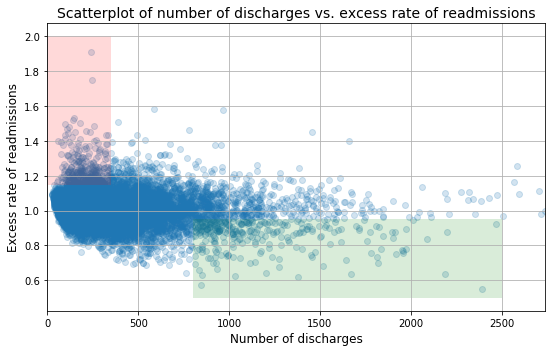

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Helpful statistics and bootstrap testing functions 

In [5]:
# For linear regressions
def pearson_r(x, y):
    """Returns the correlation coefficient from the covariance matrix."""
    covariance_matrix = np.cov(x, y)
    return covariance_matrix[0,1]

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

#### A little additional data wrangling
The scatterplot code above did not use the entire dataset--the first 81 and last 3 entries were discarded before plotting. Visual inspection reveals that the first 81 hospitals have Number of Discharges = 0 (and Excess Readmission Ratio = NaN), and the last 3 hospitals may be outliers, with far more discharges than the rest of the hospitals in the dataset. Accordingly, the analyses presented here uses that same data. An additional "Hospital Size" column is added to the new dataframe where "small" hospitals are those with less than 100 discharges, and "large" hospitals are those with greater than 1000 discharges.

In [6]:
# Create a new dataframe with only "Number of Discharges" and "Excess Readmission Ratio"
# The dropna() function removes the hospitals with Excess Readmission Ratio=NaN
tmp_df = clean_hospital_read_df.dropna(axis=0, subset=['Number of Discharges' , 'Excess Readmission Ratio'])

# Drop outlier hospitals --> Number of Discharges >= 3000
tmp_df = tmp_df[tmp_df['Number of Discharges'] < 3000]

# reset index
tmp_df = tmp_df.reset_index()

# Add column of "small" (discharges < 100) and "large" (discharges > 1000)
tmp_df = tmp_df.reindex(columns = ['Number of Discharges' , 'Excess Readmission Ratio', 'Hospital Size'])
tmp_df.loc[(tmp_df['Number of Discharges'] < 300),['Hospital Size']] = 'small (discharges < 100)'
tmp_df.loc[(tmp_df['Number of Discharges'] > 1000),['Hospital Size']] = 'large (discharges > 1000)'

### A. Do you agree with the above analysis and recommendations? Why or why not?
While the data shows that there is a significant correlation between hospital capacity (represented by discharge numbers) and readmission rates, I believe that some of the recommendations may be unnecessary in light of the very modest gains that would result from those changes. More detail is provided in the individual analysis sections below.

### B. Analysis
#### 1. Setup an appropriate hypothesis test.
The preliminary analysis concluded that there is a significant correlation between hospital capacity ('Number of Discharges') and readmission rate ('Excess Readmission Ratio'). Here I test the null hypothesis that readmission rate is actually independent of hospital capacity. In order to so, I draw many replicates where the readmission rates are held fixed, but the discharge numbers are permuted, and store the correlation coefficient for each bootstrap replicate (see below).

#### 2. Compute and report the observed significance value (or p-value).
Based on 10,000 draws from the data, the probability of observing a correlation coefficient of  r <= -2.56 (the actual Pearson r) is p=0.0. In fact, *none* of the bootstrap replicates yielded a value that low. I can reasonably reject the null hypothesis and conclude that there *is* in fact a significant correlation between hospital capacity and readmisson rate.

In [7]:
# Find the Pearson coefficient in the actual data
r_obs = pearson_r(tmp_df['Number of Discharges'], tmp_df['Excess Readmission Ratio'])
print('Observed r:',r_obs)

# Initialze permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute discharges measurements: discharges_permuted
    discharges_permuted = np.random.permutation(tmp_df['Number of Discharges'])
    
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharges_permuted, tmp_df['Excess Readmission Ratio'])

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('p-val = ', p)
print('How many replicates had a value less than or equal to the observed r?',np.sum(perm_replicates <= r_obs))

Observed r: -2.5630863000698363
p-val =  0.0
How many replicates had a value less than or equal to the observed r? 0


#### 3. Report statistical significance for  α  = .01.
Having established that a linear relationship does exist between number of discharges and readmission rate, a bootstrap testing approach is used to determine the slope and y-intercept of the regression line that best describes the data with a 99% confidence interval (see code below). The range of the slope is between \[-0.000041, -0.000037\], and the range of the y-intercept is \[1.013, 1.015\]. See Figure 2 for a visual representation of 100 regression lines (out of 10,000) generated during the bootstrap test.

In [8]:
# Find the slope and y-intercept with a 99% confidence interval
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(tmp_df['Number of Discharges'], \
                                                        tmp_df['Excess Readmission Ratio'], size=10000)

low, high = np.percentile(bs_slope_reps, [0.005, 0.995])
print('low:',low,'high:',high, 5)

low, high = np.percentile(bs_intercept_reps, [0.005,0.995])
print('low:',round(low, 4),'high:',round(high, 4))

low: -4.22364482194168e-05 high: -3.698607981362675e-05 5
low: 1.0131 high: 1.0148


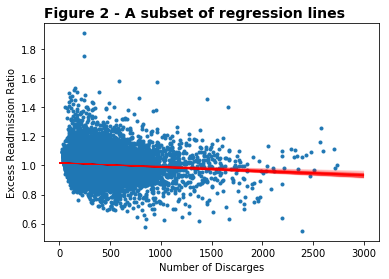

In [9]:
# Plot bootstrap regressions

# Generate array of x-vals for bootstrap lines: x
x = np.array([0, 3000])

# Plot the data
_ = plt.plot(tmp_df['Number of Discharges'], tmp_df['Excess Readmission Ratio'], marker='.', linestyle='none')

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x,
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# labels, etc
_ = plt.xlabel('Number of Discarges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Figure 2 - A subset of regression lines', loc='left', fontsize=14, fontweight='bold') 

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
There is a statistically significant correlation between number of discharges at a hospital (a proxy for hospital capacity) and the 'excess readmission ratio.' This means that we can be fairly confident that this relationship is a real one (and not observed by chance); the conclusion is that more patients require readmission at smaller hospitals than at larger ones.

When making recommendations for regulatory changes such as requiring smaller hospitals to "demonstrate upgraded resource allocation," or even forcing smaller hospitals to consolidate in order to increase capacity, it is important to consider the practical significance of this result. The mean Excess Readmission Ratio for small hospitals is 1.02, and  is 0.98 for large hospitals. The 99% confidence interval calculated above for the slope of the linear regression line is \[-0.000041, -0.000037\] which is *tiny*. The small slope indicates that there is really not much improvement in the Excess Readmission Ratio as hospital size increases.

I went back through the original dataset, and small hospitals readmitted an average of almost 16 patients over the entire 36-month reporting period. That means the 30-day readmission number was approximately 0.44 patients. Using that as the 'predicted' number of readmissions and working backward from the Excess Readmission Ratio for small hospitals, the 'expected' number of readmissions in that 30-day period would have been 0.43 patients (in contrast to the observed 0.44 patients). So yes, the small hospitals may be underperforming (they readmit more patients in a 30-day period than would have been predicted), but that underperformance does not amount to even 1 more patient being admitted per month in small hospitals.

In [10]:
small_h = tmp_df[tmp_df['Number of Discharges'] < 100]
large_h = tmp_df[tmp_df['Number of Discharges'] > 1000]

print('Excess Readmission Ratio')
print('Small hospitals (mean):', round(np.mean(small_h['Excess Readmission Ratio']), 3))
print('Large hospitals (mean):', round(np.mean(large_h['Excess Readmission Ratio']), 3))

Excess Readmission Ratio
Small hospitals (mean): 1.023
Large hospitals (mean): 0.979


#### 5. Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

The scatterplot is accurate in that it shows all of the data at the same time. It is possible, although perhaps a bit more difficult than necessary, to visually discern the negative correlation between "Number of Discharges" and "Excess Readmission Ratio." I feel that the red and green boxes are a bit misleading in that they highlight underperforming small hospitals (in red) and overperforming large hospitals (in green) while downplaying the variability in both groups. Also, the box boundaries seem a bit arbitrarily chosen.

The violin plot below (Figure 3) still shows the shape of all of the data points, but has fewer visual distractions. Here we can see that the bulk of hospitals (both large and small) have very similar Excess Readmission Ratio profiles. For most of these, the Readmission Ratio score is clustered around 1.0 (the red solid line in the plot). We do see, however, that only small hospitals exceed Readmission Ratio scores of 1.45, and no small hospital can match the Readmission Ratio scores of the best performing large hospitals.

Given that Readmission Ratio scores less than 1.0 indicate a hospital that performs better than predicted, perhaps reaching that level is a "nice to have" hospital feature that could be a long-term goal. Scores greater than 1.0 indicate that the hospital performs *worse* than it should have, which is reason for concern (although see question 4 above for the actual impact of that difference). In the plot below we see that the distribution of scores above 1.0 is similar in both small and large hospitals except that there are far more outlier hospitals with large scores in the small hospital group. Outliers do also exist in the large hospital group. Perhaps an alternate recommendation should be that *any* hospital with an Excess Readmission Ratio score that exceeds (for example) 1.2 should face additional scrutiny.

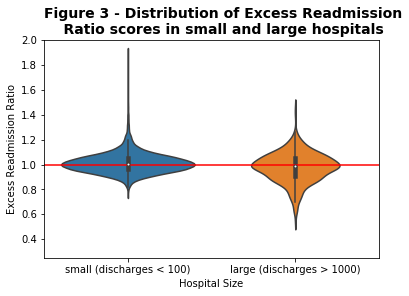

In [11]:
import seaborn as sns
_ = sns.violinplot(x='Hospital Size', y='Excess Readmission Ratio', data=tmp_df)
_ = plt.axhline(1.0, color='red')
_ = plt.ylim([0.25, 2])
_ = plt.title('Figure 3 - Distribution of Excess Readmission\n    Ratio scores in small and large hospitals',\
              loc='left', fontsize=14, fontweight='bold') 